## Creating a Neural Network

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into train and test 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Preprocessing
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [2]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Building the Model

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3) 
])

### Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [5]:
model.fit(train_images, train_labels, epochs=1) # we pass the data, labels and epochs and watch the magic!

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5006 - accuracy: 0.8239


### Evaluating\Testing the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("test accuracy: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.8429
test accuracy:  0.8428999781608582


### Making Predictions

313/313 [==============================] - 1s 2ms/step
Shirt


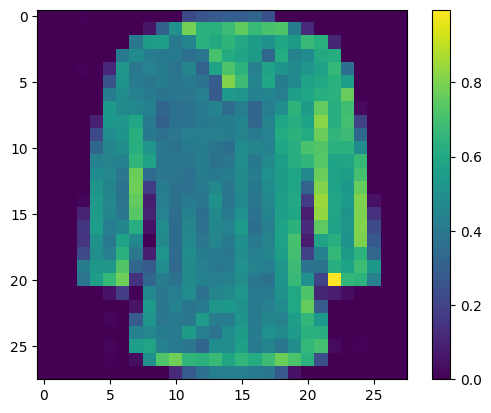

In [7]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[4])]) # predict the test image

# Let's plot the image using matplotlib
plt.figure()
plt.imshow(test_images[4]) # let's see the image that we predicted
plt.colorbar()
plt.grid(False)
plt.show()